<a href="https://colab.research.google.com/github/esteban1997/-MINTIC-Curso-de-Introducci-n-a-Machine-Learning/blob/master/clasificador_de_imagenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim

from torchvision import utils
from torchvision import datasets
from torchvision import transforms

from PIL import Image
import urllib.request as request
from matplotlib import pyplot as plt


#Construyendo un modelo

In [0]:
data_path = 'data/'
transform = transforms.Compose(
              [transforms.ToTensor(),
               transforms.Normalize((0.4915, 0.4823, 0.4468), 
                                    (0.2470, 0.2435, 0.2616))
              ])

In [3]:
full_data_set = datasets.CIFAR10(
    data_path,
    train=True,
    download=True, 
    transform = transform)

full_validation_set = datasets.CIFAR10(
    data_path,
    train=False,
    download=True, 
    transform = transform)

0it [00:00, ?it/s]

170500096it [00:02, 69132377.69it/s]                               


Extracting data/cifar-10-python.tar.gz to data/
Files already downloaded and verified


In [0]:
size = 4
dataloader = torch.utils.data.DataLoader(
    full_data_set,
    batch_size = size, 
    shuffle=True,
    num_workers = 2
)



In [5]:
len(full_data_set)

50000

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


frog
car
ship
ship


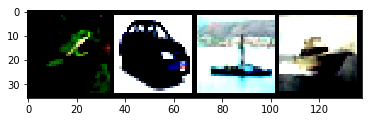

In [6]:
data_iterator = iter(dataloader)
imgs,labels = data_iterator.next()

classes = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']

plt.imshow(utils.make_grid(imgs).permute(1,2,0))

for i in range(size):
  print(classes[labels[i]])
  


In [0]:
class_names=['car','cat']

#X:Y X= cual tomare, Y= donde quedara
label_map = {1:0,3:1}


data_set = [(img,label_map[label]) for img, label in full_data_set if label in [1,3]]
validation_set = [(img,label_map[label]) for img, label in full_validation_set if label in [1,3]]

In [8]:
img,label = data_set[20]
img.shape

torch.Size([3, 32, 32])

In [0]:
model = nn.Sequential(
          #
          nn.Linear(3*32*32,512),
          nn.Tanh(),
          #512 son los pasos y el 2 es porque es un clasificador ibnari oasi que tiene 2 opciones
          nn.Linear(512,2)
)

In [0]:

def softmax(x):
  return torch.exp(x) / torch.exp(x).sum()

In [0]:
x = torch.tensor([1.0,2.0,3.0])

In [12]:
softmax(x).sum()

tensor(1.)

In [0]:
#aqui esty armando la red neuronal, cada nn.linear y nn.tanh es una capa + el tipo de funcion

model = nn.Sequential(
          #
          nn.Linear(3*32*32,512),
          nn.Tanh(),
          #512 son los intermedios y el 2 es porque es un clasificador binario asi que tiene 2 opciones al final
          nn.Linear(512,2),
          #dim en que dimension quiero trabajar
          nn.Softmax(dim=1)
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'car'

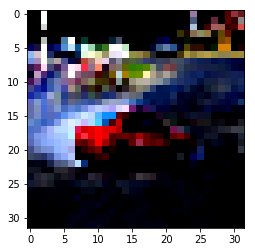

In [14]:
img, label = data_set[20]
plt.imshow(img.permute(1,2,0))
class_names[label]

In [15]:
out = model(img.view(-1).unsqueeze(0))
out

tensor([[0.5606, 0.4394]], grad_fn=<SoftmaxBackward>)

In [0]:
_, index = torch.max(out,dim=1)

In [17]:
print('->', class_names[label],' model:',class_names[index])

-> car  model: car


#Implementando  un clasificador totalmente conectado

In [0]:
model = nn.Sequential(
          #
          nn.Linear(3*32*32,512),
          nn.Tanh(),
          #512 son los pasos y el 2 es porque es un clasificador binario asi que tiene 2 opciones
          nn.Linear(512,2),
          #dim en que dimension quiero trabajar
          nn.LogSoftmax(dim=1)
)

loss_function = nn.NLLLoss

In [0]:
img , label = data_set[20]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'car'

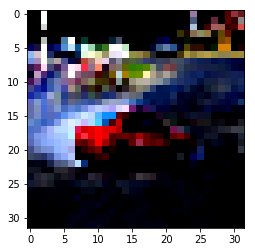

In [20]:
img, label = data_set[20]
plt.imshow(img.permute(1,2,0))
class_names[label]


In [21]:
out = model(img.view(-1).unsqueeze(0))
print(out)

print('->', class_names[label],' model:',class_names[index])

tensor([[-0.8435, -0.5624]], grad_fn=<LogSoftmaxBackward>)
-> car  model: car


In [22]:
model = nn.Sequential(
          #
          nn.Linear(3*32*32,512),
          nn.Tanh(),
          #512 son los pasos y el 2 es porque es un clasificador ibnari oasi que tiene 2 opciones
          nn.Linear(512,2),
          #dim en que dimension quiero trabajar
          nn.LogSoftmax(dim=1)
)

loss_function = nn.NLLLoss()

#como se calculan los gradientes para minimizar el loss
optimizer = optim.SGD(model.parameters(), lr = 0.01)

n_epochs = 5

for epoch in range(n_epochs):
  for img,label in  data_set:
    out= model(img.view(-1).unsqueeze(0)) 
    loss = loss_function(out, torch.tensor([label]))
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
  print("Epoch: %d, Loss:%f" % (epoch,float(loss)))

Epoch: 0, Loss:0.032476
Epoch: 1, Loss:0.006231
Epoch: 2, Loss:0.046760
Epoch: 3, Loss:0.398408
Epoch: 4, Loss:0.041787


In [23]:
#hace que sea mas rapido
train_loader = torch.utils.data.DataLoader(data_set,batch_size=64,shuffle=True)

model = nn.Sequential(
          #
          nn.Linear(3*32*32,512),
          nn.Tanh(),
          #512 son los pasos y el 2 es porque es un clasificador ibnari oasi que tiene 2 opciones
          nn.Linear(512,2),
          #dim en que dimension quiero trabajar
          nn.LogSoftmax(dim=1)
)

loss_function = nn.NLLLoss()

#como se calculan los gradientes para minimizar el loss
optimizer = optim.SGD(model.parameters(), lr = 0.01)

n_epochs = 100

for epoch in range(n_epochs):
  for img,label in  train_loader:
    out= model(img.view(img.shape[0],-1)) 
    loss = loss_function(out, label)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
  print("Epoch: %d, Loss:%f" % (epoch,float(loss)))

Epoch: 0, Loss:0.314988
Epoch: 1, Loss:0.589196
Epoch: 2, Loss:0.554606
Epoch: 3, Loss:0.323003
Epoch: 4, Loss:0.182925
Epoch: 5, Loss:0.524368
Epoch: 6, Loss:0.223683
Epoch: 7, Loss:0.397317
Epoch: 8, Loss:0.461827
Epoch: 9, Loss:0.250301
Epoch: 10, Loss:0.165186
Epoch: 11, Loss:0.237585
Epoch: 12, Loss:0.141435
Epoch: 13, Loss:0.243064
Epoch: 14, Loss:0.504071
Epoch: 15, Loss:0.144327
Epoch: 16, Loss:0.216915
Epoch: 17, Loss:0.195731
Epoch: 18, Loss:0.374422
Epoch: 19, Loss:0.305740
Epoch: 20, Loss:0.234662
Epoch: 21, Loss:0.210033
Epoch: 22, Loss:0.211994
Epoch: 23, Loss:0.104457
Epoch: 24, Loss:0.067588
Epoch: 25, Loss:0.155233
Epoch: 26, Loss:0.056506
Epoch: 27, Loss:0.103042
Epoch: 28, Loss:0.057828
Epoch: 29, Loss:0.073659
Epoch: 30, Loss:0.083342
Epoch: 31, Loss:0.167866
Epoch: 32, Loss:0.061074
Epoch: 33, Loss:0.086802
Epoch: 34, Loss:0.071504
Epoch: 35, Loss:0.027419
Epoch: 36, Loss:0.034443
Epoch: 37, Loss:0.078953
Epoch: 38, Loss:0.046927
Epoch: 39, Loss:0.076427
Epoch: 40,

In [24]:
val_loader = torch.utils.data.DataLoader(validation_set,batch_size=64,shuffle=False)

correct = 0
total = 0

with torch.no_grad():
  for imgs,labels in val_loader:
    outputs = model(imgs.view(imgs.shape[0],-1))
    _, predicted = torch.max(outputs,dim=1)
    total+= labels.shape[0]
    
    correct += int((predicted==labels).sum())
    
print("Accuracy: %f " % (correct/total))

Accuracy: 0.873500 


->:  car  model:  car


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


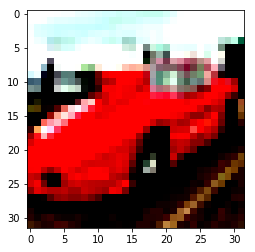

In [25]:
img, label = validation_set[20]
out = model(img.view(-1).unsqueeze(0))

_, index = torch.max(out,dim=1)

print('->: ',class_names[label],' model: ', class_names[index])
plt.imshow(img.permute(1,2,0))
plt.show()